In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


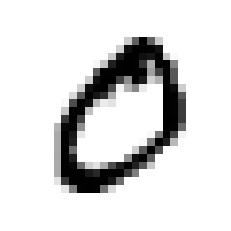

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
y[1]

'0'

In [5]:
import numpy as np
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([X[2300]])

array([False])

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[52938,  1641],
       [  913,  4508]])

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.7331273377785006
0.831580889134846
0.779256698357822


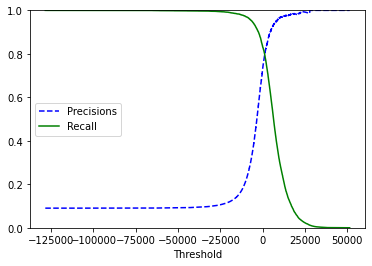

In [8]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, 
                             cv=3, method='decision_function')

precisions, recalls, thresolds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresolds):
    plt.plot(thresolds, precisions[:-1], "b--", label='Precisions')
    plt.plot(thresolds, recalls[:-1], "g-", label="Recall" )
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresolds)
plt.show()

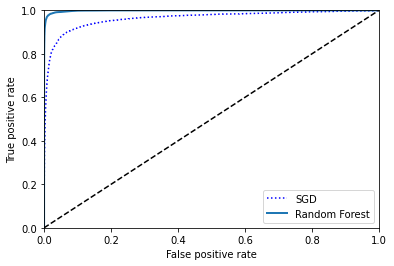

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')
y_scores_forest = y_probas_forest[:,1]

fpr, tpr, thresolds = roc_curve(y_train_5, y_scores)
fpr_forest, tpr_forest, thresolds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [10]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_train_5, y_scores_forest))

0.9985358739971056


In [11]:
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_forest_pred)

array([[54528,    51],
       [  709,  4712]])

In [12]:
sgd_clf.fit(X_train, y_train)
prediction = sgd_clf.predict([X[1]])
prediction

array(['0'], dtype='<U1')

In [14]:
sds = sgd_clf.decision_function([X[1]])
sds

array([[ 23610.08886763, -24021.64042895, -11163.53912006,
         -9862.5347551 , -23970.24030112,  -6022.7244068 ,
        -23472.2436766 , -25526.81169572,  -5235.01966446,
         -9992.19966182]])

In [15]:
forest_clf.fit(X_train, y_train)
prediction = forest_clf.predict([X[1]])
prediction

array(['0'], dtype=object)